Emerging Technologies Project 2020 - Steven Joyce -G00362012

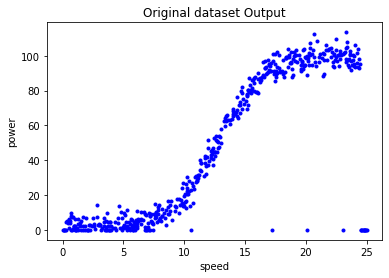

In [18]:
#All imports to be used in the file
import pandas as pd
import numpy as np
import tensorflow
import tensorflow.keras as kr
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# storing the excel file in a variable
dataset = pd.read_csv("powerproduction.csv")
#plot the original data in a graph
plt.title('Original dataset Output')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'b.');

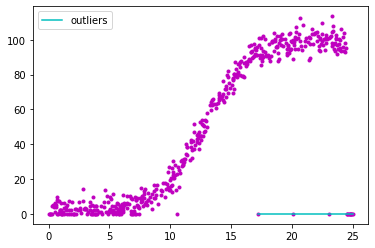

In [19]:
clustering = DBSCAN(eps=avg_dist, min_samples=15).fit(train_data)

# find the anomolies in the dataset
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# get the outliers and store in a variable
outlierPoints = train_data.values[outliers]

#print out graph to highlight the outliers
plt.plot(train_data.values[:,0], train_data.values[:,1], 'm.')
plt.plot(outlierPoints[:,0], outlierPoints[:,1], color='c', label='outliers')
plt.legend();

In [20]:
#create a new dataset without the outliers included
modataset = train_data.drop(outliers)

In [21]:
# train model
model = kr.models.Sequential()
model.add(Dense(100, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(layers.LayerNormalization(axis=1))
model.add(Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# compile model
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
# Train the neural network on our data.
model.fit(modataset['speed'], modataset['power'], epochs=1000, batch_size=10)

Epoch 1/1000
49/49 [==============================] - 0s 729us/step - loss: 4000.3914
Epoch 2/1000
49/49 [==============================] - 0s 750us/step - loss: 3249.1064
Epoch 3/1000
49/49 [==============================] - 0s 729us/step - loss: 2342.6928
Epoch 4/1000
49/49 [==============================] - 0s 729us/step - loss: 1989.1496
Epoch 5/1000
49/49 [==============================] - 0s 750us/step - loss: 1741.4239
Epoch 6/1000
49/49 [==============================] - 0s 812us/step - loss: 1466.8114
Epoch 7/1000
49/49 [==============================] - 0s 792us/step - loss: 1090.9176
Epoch 8/1000
49/49 [==============================] - 0s 729us/step - loss: 964.2161
Epoch 9/1000
49/49 [==============================] - 0s 750us/step - loss: 751.0721
Epoch 10/1000
49/49 [==============================] - 0s 792us/step - loss: 631.8119
Epoch 11/1000
49/49 [==============================] - 0s 729us/step - loss: 478.1360
Epoch 12/1000
49/49 [==============================] - 0

49/49 [==============================] - 0s 708us/step - loss: 25.2833
Epoch 98/1000
49/49 [==============================] - 0s 750us/step - loss: 27.3312
Epoch 99/1000
49/49 [==============================] - 0s 708us/step - loss: 23.0605
Epoch 100/1000
49/49 [==============================] - 0s 708us/step - loss: 26.5622
Epoch 101/1000
49/49 [==============================] - 0s 750us/step - loss: 25.2512
Epoch 102/1000
49/49 [==============================] - 0s 708us/step - loss: 24.9899
Epoch 103/1000
49/49 [==============================] - 0s 729us/step - loss: 27.7477
Epoch 104/1000
49/49 [==============================] - 0s 771us/step - loss: 24.6401
Epoch 105/1000
49/49 [==============================] - 0s 875us/step - loss: 22.0823
Epoch 106/1000
49/49 [==============================] - 0s 854us/step - loss: 25.8103
Epoch 107/1000
49/49 [==============================] - 0s 792us/step - loss: 26.5470
Epoch 108/1000
49/49 [==============================] - 0s 792us/step -

49/49 [==============================] - 0s 687us/step - loss: 18.9189
Epoch 193/1000
49/49 [==============================] - 0s 688us/step - loss: 18.1551
Epoch 194/1000
49/49 [==============================] - 0s 687us/step - loss: 18.8797
Epoch 195/1000
49/49 [==============================] - 0s 688us/step - loss: 17.3989
Epoch 196/1000
49/49 [==============================] - 0s 687us/step - loss: 17.4749
Epoch 197/1000
49/49 [==============================] - 0s 708us/step - loss: 16.9285
Epoch 198/1000
49/49 [==============================] - 0s 708us/step - loss: 18.4888
Epoch 199/1000
49/49 [==============================] - 0s 708us/step - loss: 18.2900
Epoch 200/1000
49/49 [==============================] - 0s 687us/step - loss: 16.1266
Epoch 201/1000
49/49 [==============================] - 0s 729us/step - loss: 16.4322
Epoch 202/1000
49/49 [==============================] - 0s 667us/step - loss: 16.1037
Epoch 203/1000
49/49 [==============================] - 0s 688us/step

49/49 [==============================] - 0s 771us/step - loss: 19.5188
Epoch 288/1000
49/49 [==============================] - 0s 750us/step - loss: 20.5682
Epoch 289/1000
49/49 [==============================] - 0s 750us/step - loss: 16.9960
Epoch 290/1000
49/49 [==============================] - 0s 729us/step - loss: 20.8648
Epoch 291/1000
49/49 [==============================] - 0s 896us/step - loss: 20.2259
Epoch 292/1000
49/49 [==============================] - 0s 917us/step - loss: 18.7006
Epoch 293/1000
49/49 [==============================] - 0s 875us/step - loss: 17.9374
Epoch 294/1000
49/49 [==============================] - 0s 875us/step - loss: 19.1439
Epoch 295/1000
49/49 [==============================] - 0s 875us/step - loss: 16.1976
Epoch 296/1000
49/49 [==============================] - 0s 833us/step - loss: 20.9216
Epoch 297/1000
49/49 [==============================] - 0s 958us/step - loss: 17.2422
Epoch 298/1000
49/49 [==============================] - 0s 854us/step

49/49 [==============================] - 0s 1ms/step - loss: 16.2383
Epoch 383/1000
49/49 [==============================] - 0s 708us/step - loss: 18.9270
Epoch 384/1000
49/49 [==============================] - 0s 729us/step - loss: 18.4763
Epoch 385/1000
49/49 [==============================] - 0s 688us/step - loss: 17.6570
Epoch 386/1000
49/49 [==============================] - 0s 729us/step - loss: 16.7300
Epoch 387/1000
49/49 [==============================] - 0s 625us/step - loss: 18.1757
Epoch 388/1000
49/49 [==============================] - 0s 688us/step - loss: 17.7782
Epoch 389/1000
49/49 [==============================] - 0s 729us/step - loss: 16.8953
Epoch 390/1000
49/49 [==============================] - 0s 708us/step - loss: 17.0328
Epoch 391/1000
49/49 [==============================] - 0s 791us/step - loss: 17.8901
Epoch 392/1000
49/49 [==============================] - 0s 792us/step - loss: 19.7297
Epoch 393/1000
49/49 [==============================] - 0s 708us/step -

49/49 [==============================] - 0s 646us/step - loss: 19.2338
Epoch 478/1000
49/49 [==============================] - 0s 750us/step - loss: 19.4378
Epoch 479/1000
49/49 [==============================] - 0s 792us/step - loss: 17.0466
Epoch 480/1000
49/49 [==============================] - 0s 792us/step - loss: 17.2612
Epoch 481/1000
49/49 [==============================] - 0s 792us/step - loss: 19.6606
Epoch 482/1000
49/49 [==============================] - 0s 792us/step - loss: 23.6792
Epoch 483/1000
49/49 [==============================] - 0s 792us/step - loss: 21.3053
Epoch 484/1000
49/49 [==============================] - 0s 792us/step - loss: 15.4479
Epoch 485/1000
49/49 [==============================] - 0s 812us/step - loss: 19.4478
Epoch 486/1000
49/49 [==============================] - 0s 813us/step - loss: 20.1169
Epoch 487/1000
49/49 [==============================] - 0s 875us/step - loss: 20.0853
Epoch 488/1000
49/49 [==============================] - 0s 916us/step

49/49 [==============================] - 0s 667us/step - loss: 17.0395
Epoch 573/1000
49/49 [==============================] - 0s 667us/step - loss: 17.9278
Epoch 574/1000
49/49 [==============================] - 0s 708us/step - loss: 22.2700
Epoch 575/1000
49/49 [==============================] - 0s 687us/step - loss: 18.5170
Epoch 576/1000
49/49 [==============================] - 0s 667us/step - loss: 21.4928
Epoch 577/1000
49/49 [==============================] - 0s 667us/step - loss: 20.3526
Epoch 578/1000
49/49 [==============================] - 0s 667us/step - loss: 18.1153
Epoch 579/1000
49/49 [==============================] - 0s 646us/step - loss: 17.4499
Epoch 580/1000
49/49 [==============================] - 0s 646us/step - loss: 20.1951
Epoch 581/1000
49/49 [==============================] - 0s 646us/step - loss: 21.1302
Epoch 582/1000
49/49 [==============================] - 0s 667us/step - loss: 19.9666
Epoch 583/1000
49/49 [==============================] - 0s 687us/step

49/49 [==============================] - 0s 687us/step - loss: 17.6738
Epoch 668/1000
49/49 [==============================] - 0s 667us/step - loss: 19.4414
Epoch 669/1000
49/49 [==============================] - 0s 687us/step - loss: 18.6687
Epoch 670/1000
49/49 [==============================] - 0s 687us/step - loss: 17.9709
Epoch 671/1000
49/49 [==============================] - 0s 708us/step - loss: 16.8431
Epoch 672/1000
49/49 [==============================] - 0s 667us/step - loss: 16.4999
Epoch 673/1000
49/49 [==============================] - 0s 667us/step - loss: 19.3122
Epoch 674/1000
49/49 [==============================] - 0s 667us/step - loss: 18.7784
Epoch 675/1000
49/49 [==============================] - 0s 667us/step - loss: 19.1416
Epoch 676/1000
49/49 [==============================] - 0s 667us/step - loss: 18.7263
Epoch 677/1000
49/49 [==============================] - 0s 667us/step - loss: 20.1881
Epoch 678/1000
49/49 [==============================] - 0s 667us/step

49/49 [==============================] - 0s 667us/step - loss: 17.0464
Epoch 763/1000
49/49 [==============================] - 0s 667us/step - loss: 21.4375
Epoch 764/1000
49/49 [==============================] - 0s 708us/step - loss: 20.1122
Epoch 765/1000
49/49 [==============================] - 0s 646us/step - loss: 17.0690
Epoch 766/1000
49/49 [==============================] - 0s 667us/step - loss: 21.1900
Epoch 767/1000
49/49 [==============================] - 0s 667us/step - loss: 18.0783
Epoch 768/1000
49/49 [==============================] - 0s 667us/step - loss: 16.0815
Epoch 769/1000
49/49 [==============================] - 0s 667us/step - loss: 19.5834
Epoch 770/1000
49/49 [==============================] - 0s 667us/step - loss: 21.7164
Epoch 771/1000
49/49 [==============================] - 0s 708us/step - loss: 16.9837
Epoch 772/1000
49/49 [==============================] - 0s 667us/step - loss: 20.9303
Epoch 773/1000
49/49 [==============================] - 0s 667us/step

49/49 [==============================] - 0s 646us/step - loss: 16.0289
Epoch 858/1000
49/49 [==============================] - 0s 661us/step - loss: 17.0911
Epoch 859/1000
49/49 [==============================] - 0s 646us/step - loss: 17.7909
Epoch 860/1000
49/49 [==============================] - 0s 667us/step - loss: 20.4025
Epoch 861/1000
49/49 [==============================] - 0s 646us/step - loss: 16.1922
Epoch 862/1000
49/49 [==============================] - 0s 708us/step - loss: 19.0052
Epoch 863/1000
49/49 [==============================] - 0s 667us/step - loss: 17.9744
Epoch 864/1000
49/49 [==============================] - 0s 667us/step - loss: 17.0487
Epoch 865/1000
49/49 [==============================] - 0s 667us/step - loss: 17.1878
Epoch 866/1000
49/49 [==============================] - 0s 708us/step - loss: 21.4141
Epoch 867/1000
49/49 [==============================] - 0s 667us/step - loss: 17.5302
Epoch 868/1000
49/49 [==============================] - 0s 646us/step

49/49 [==============================] - 0s 667us/step - loss: 17.0333
Epoch 953/1000
49/49 [==============================] - 0s 646us/step - loss: 15.9426
Epoch 954/1000
49/49 [==============================] - 0s 646us/step - loss: 19.0590
Epoch 955/1000
49/49 [==============================] - 0s 729us/step - loss: 19.2164
Epoch 956/1000
49/49 [==============================] - 0s 687us/step - loss: 17.3552
Epoch 957/1000
49/49 [==============================] - 0s 667us/step - loss: 17.1813
Epoch 958/1000
49/49 [==============================] - 0s 646us/step - loss: 17.0369
Epoch 959/1000
49/49 [==============================] - 0s 667us/step - loss: 16.1156
Epoch 960/1000
49/49 [==============================] - 0s 667us/step - loss: 16.9105
Epoch 961/1000
49/49 [==============================] - 0s 667us/step - loss: 17.1614
Epoch 962/1000
49/49 [==============================] - 0s 646us/step - loss: 17.0748
Epoch 963/1000
49/49 [==============================] - 0s 646us/step

In [22]:
model.predict([20])

array([[98.126686]], dtype=float32)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               200       
_________________________________________________________________
layer_normalization_1 (Layer (None, 100)               200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


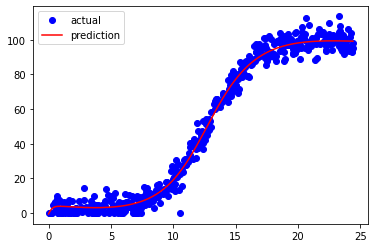

In [24]:
plt.plot(modataset['speed'], modataset['power'], "bo", label='actual')
plt.plot(modataset['speed'], model.predict(modataset['speed']),'r', label='prediction')
plt.legend();

In [25]:
model.save("datamodel.h5")
print("Saved model to directory")

Saved model to directory


In [17]:
# User can run a prediction for the dataset
user = int(input("Enter Speed prediction: "));
dataset['speed'] = user
dataset['power'] = model.predict(dataset['speed'])
power = dataset['power'][0]
print("Power Prediction: ", power)

Enter Speed prediction: 11
Power Prediction:  27.434166


# Analysis

For this dataset I found that the the outliers had a big affect on how accurate a predict could be. This led me to remove the outliers from the dataset and create a modified dataset called modataset. 
I Built the Sequential Model using botha Sigmoid and a Linear Layer to increase the accuracy of the model.
To compile the Model I used the adam algrotihm.
For the training of the model I choose to output in 1000 times because the data loss was at a stable and low level.
I added in a user input driven prediction function to allow the user to generate a result. The result is the power of the wind turbine at the inputted speed.

# References

Tensorflow model:https://www.tensorflow.org/api_docs/python/tf/keras/Model <br />
keras model:https://keras.io/api/models/model/ <br />
clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html <br />
Keras function help: https://machinelearningmastery.com/keras-functional-api-deep-learning/ <br />
